In [1]:
import pandas as pd


import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

matplotlib.rcParams['font.size'] = 17
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



%matplotlib inline

In [2]:
df = pd.read_parquet('model_data.parquet')
data = df.copy()
data.head()

,gender,age,married,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
Customer ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37.0,Yes,0.0,41,34.827662,-118.999073,2.0,9,None,...,One Year,Yes,Credit Card,65.6,593.30,0.0,0.0,381.51,974.81,Stayed
0003-MKNFE,Male,46.0,No,0.0,70,34.162515,-118.203869,0.0,9,None,...,Month-to-Month,No,Credit Card,NaN,542.40,NaN,10.0,96.21,610.28,Stayed
0004-TLHLJ,Male,50.0,No,0.0,-45,33.645672,-117.922613,0.0,4,Offer E,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.0,0.0,134.60,415.45,Churned
0011-IGKFF,Male,NaN,Yes,0.0,89,38.014457,-122.115432,1.0,13,Offer D,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.0,0.0,361.66,1599.51,Churned
0013-EXCHZ,Female,75.0,Yes,0.0,82,34.227846,-119.079903,3.0,3,None,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.0,0.0,22.14,289.54,Churned


In [3]:
data.isna().sum()/len(data)

gender                               0.000000
age                                  0.085191
married                              0.000000
number_of_dependents                 0.003692
zip_code                             0.000000
latitude                             0.000000
longitude                            0.000000
number_of_referrals                  0.031947
tenure_in_months                     0.000000
offer                                0.000000
phone_service                        0.000000
avg_monthly_long_distance_charges    0.100099
multiple_lines                       0.000000
internet_service                     0.000000
internet_type                        0.000000
avg_monthly_gb_download              0.075678
online_security                      0.000000
online_backup                        0.000000
device_protection_plan               0.000000
premium_tech_support                 0.000000
streaming_tv                         0.000000
streaming_movies                  

**plotting Heatmp**

<AxesSubplot:>

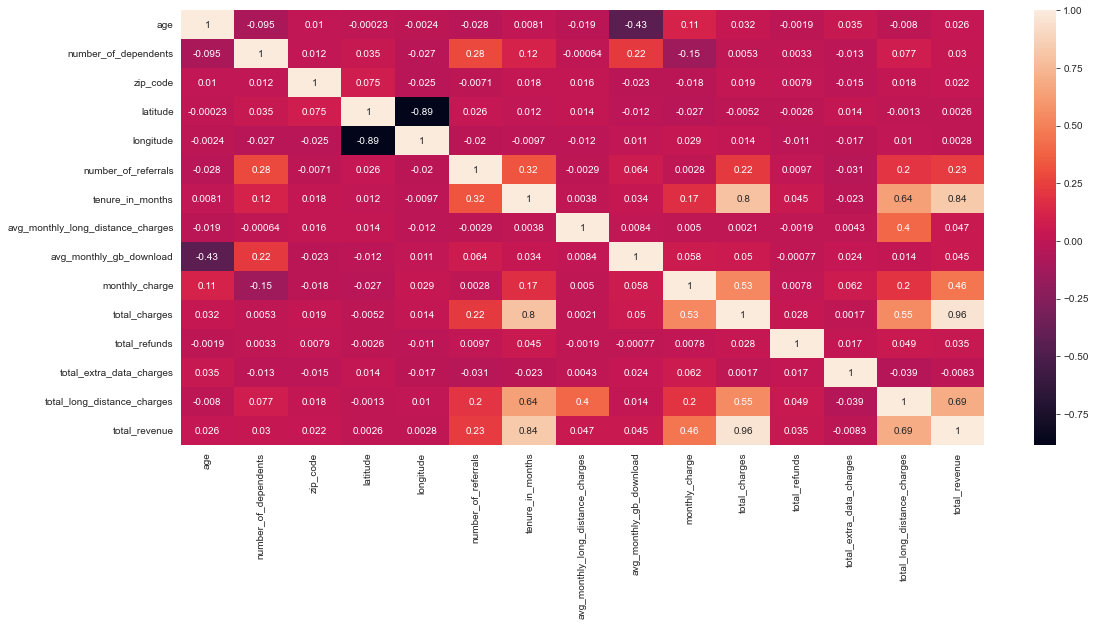

In [4]:
fig = plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), annot=True)

As you can see in the heatmap, some of the features in the dataset are highly correlated with each other. So, there exists multicollinearity.

In [5]:
# Define Feature matrix ad Target vector
X = data.drop('customer_status', axis = 1)
y = data.customer_status

# Make train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle=True)

#impute 'nan' values in numeric columns
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer()
# num_col = list(X.select_dtypes('number').columns)
# imputer.fit(X[num_col])
# X_train[num_col] = imputer.fit_transform(X_train[num_col])

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline



clf = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    StandardScaler(), 
    LogisticRegression(max_iter = 5000, random_state = 42)
)

#Train the  model
clf.fit(X_train, y_train)

## Make predictions
y_preds = clf.predict(X_test)

# Measure accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy:", round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy:", round(accuracy_score(y_test, y_preds), 2))

Train accuracy: 0.83
Test accuracy: 0.81


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder

# Define Feature matrix ad Target vector
X1 = data.drop('customer_status', axis = 1)
y1 = data.customer_status

# Create training, validation and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size = 0.25, random_state = 42)

## Identify numeric and categorical columns
num_cols = X1.select_dtypes('number').columns.to_list()
cat_cols = X1.select_dtypes('category').columns.to_list()

In [7]:
print('Feature Matrix shape:', X1.shape)
print('Target Vector shape:', y1.shape)

print('\nTrain shape:', X_train1.shape)
print('Test shape:', X_test1.shape)

Feature Matrix shape: (7043, 33)
Target Vector shape: (7043,)

Train shape: (5282, 33)
Test shape: (1761, 33)


In [8]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder

In [9]:
# Impute missing numerical values
imputer = SimpleImputer(strategy = 'most_frequent')

imputer.fit(X1[num_cols + cat_cols])

X_train1[num_cols + cat_cols] = imputer.transform(X_train1[num_cols + cat_cols])
X_test1[num_cols + cat_cols] = imputer.transform(X_test1[num_cols + cat_cols])


# Scale numeric features
scaler = StandardScaler()
scaler.fit(X1[num_cols])
X_train1[num_cols] = scaler.transform(X_train1[num_cols])
X_test1[num_cols] = scaler.transform(X_test1[num_cols])

In [10]:
X_train1.isna().sum()

gender                               0
age                                  0
married                              0
number_of_dependents                 0
zip_code                             0
latitude                             0
longitude                            0
number_of_referrals                  0
tenure_in_months                     0
offer                                0
phone_service                        0
avg_monthly_long_distance_charges    0
multiple_lines                       0
internet_service                     0
internet_type                        0
avg_monthly_gb_download              0
online_security                      0
online_backup                        0
device_protection_plan               0
premium_tech_support                 0
streaming_tv                         0
streaming_movies                     0
streaming_music                      0
unlimited_data                       0
contract                             0
paperless_billing        

In [11]:
# One-hot encode categorical features
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(X1[cat_cols])

encoded_cols = list(encoder.get_feature_names_out(cat_cols))
X_train1[encoded_cols] = encoder.transform(X_train1[cat_cols])
X_test1[encoded_cols] = encoder.transform(X_test1[cat_cols])

In [12]:
X_train1 = X_train1[encoded_cols + num_cols].copy()
X_test1 = X_test1[encoded_cols + num_cols].copy()
X_train1.head()

,gender_Female,gender_Male,married_No,married_Yes,offer_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,...,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
Customer ID,,,,,,,,,,,,,,,,,,,,,
9391-EOYLI,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.257627,-0.830746,-1.548445,-0.336612,0.594558,-0.594099,-0.144224,-0.192261,-0.793790,-0.730234
3714-JTVOV,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.257627,0.391732,0.020403,-0.191442,0.371253,0.575021,-0.144224,-0.192261,-0.738554,0.214707
3354-OADJP,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.633189,-0.993743,1.452649,0.244069,-0.334106,-0.851832,-0.144224,-0.192261,-0.419472,-0.829668
5787-KXGIY,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.493496,1.614210,0.020403,-0.191442,-1.546331,-0.412206,-0.144224,-0.192261,-0.642847,-0.543118
1024-KPRBB,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.633189,0.228735,0.389150,-0.409197,0.901159,0.632779,-0.144224,-0.192261,0.740216,0.713903


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

In [14]:
# Create and train the model
model = LogisticRegression(solver='liblinear', max_iter=5000, random_state=42)
model.fit(X_train1, y_train1)

LogisticRegression(max_iter=5000, random_state=42, solver='liblinear')

In [15]:
# Generate predictions and probabilities
y_preds1 = model.predict(X_test1)
print("Train accuracy:", round(accuracy_score(y_train1, model.predict(X_train1)), 2))
print("Test accuracy:", round(accuracy_score(y_test1, y_preds1), 2))

Train accuracy: 0.81
Test accuracy: 0.81


In [16]:
y_preds[:15]

array(['Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Churned',
       'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed',
       'Stayed', 'Stayed', 'Joined'], dtype=object)

In [17]:
len(clf.predict_proba(X_test)[:])

1409

In [18]:
y_preds1[:15]

array(['Stayed', 'Stayed', 'Stayed', 'Churned', 'Stayed', 'Churned',
       'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed', 'Stayed',
       'Stayed', 'Stayed', 'Joined'], dtype=object)

In [19]:
model.predict_proba(X_test1)[:15]

array([[7.91918042e-03, 1.76251207e-05, 9.92063194e-01],
       [1.28754708e-01, 1.01050373e-13, 8.71245292e-01],
       [1.76604985e-02, 2.00662301e-13, 9.82339502e-01],
       [7.27483131e-01, 1.40291064e-01, 1.32225804e-01],
       [2.25225136e-03, 9.83293068e-02, 8.99418442e-01],
       [5.52774191e-01, 1.32059133e-11, 4.47225809e-01],
       [1.61091103e-02, 2.89752360e-14, 9.83890890e-01],
       [2.32495753e-01, 1.48274161e-03, 7.66021505e-01],
       [2.73840915e-02, 2.77038445e-04, 9.72338870e-01],
       [1.34405982e-02, 1.67777605e-12, 9.86559402e-01],
       [2.83619462e-02, 2.73638966e-13, 9.71638054e-01],
       [5.79050169e-02, 9.57366733e-04, 9.41137616e-01],
       [2.81789194e-02, 2.11240540e-07, 9.71820869e-01],
       [1.68360411e-03, 2.31345291e-12, 9.98316396e-01],
       [4.14501780e-01, 4.15612660e-01, 1.69885560e-01]])

In [20]:
weights = clf.named_steps['logisticregression'].coef_#.tolist()

In [21]:
weights1 = model.coef_#.tolist()
model.intercept_

array([-0.31329704, -1.61213827,  0.23340845])

In [22]:
weights[1]

array([ 1.60785372e-02, -1.60785372e-02, -1.45531631e-01, -1.81605953e-01,
        1.81605953e-01,  1.37746840e-01,  4.23995425e-02,  7.77070759e-02,
        8.97534954e-02,  6.51339099e-01, -5.56573690e+00,  1.06492718e-01,
       -2.27407524e-02,  1.76628205e-01, -4.14201624e-01, -6.20092956e-03,
        3.08732465e-03,  9.28923153e-02, -9.28923153e-02,  1.38323936e-01,
        5.28823226e-02, -5.28823226e-02, -4.71569306e-03,  4.71569306e-03,
       -4.42863240e-02,  1.05583082e-02,  4.79038603e-02, -9.67814012e-02,
        4.59266915e-02, -4.59266915e-02,  7.33493891e-02, -7.33493891e-02,
        3.65601201e-02, -3.65601201e-02, -1.95712581e-02,  1.95712581e-02,
        1.94138366e-02, -1.94138366e-02, -8.59637189e-02,  8.59637189e-02,
        1.23306043e-01, -1.23306043e-01, -4.69290339e-02,  4.69290339e-02,
       -1.81634366e-01,  1.82979291e-04,  2.04453349e-01,  6.81740249e-02,
       -6.81740249e-02, -5.74849983e-02,  9.66325738e-02, -8.29199534e-02,
       -1.88759371e-01,  

In [23]:
weights1[1]

array([-8.46792165e-01, -7.65346107e-01, -3.14468176e-01, -1.29767010e+00,
       -1.60895753e-01, -1.56717162e-04, -6.38424744e-04, -2.45274688e-02,
       -1.17864815e+00, -2.47271762e-01, -1.32132231e+00, -2.90815965e-01,
       -6.45025008e-01, -9.67113264e-01, -9.68165299e-01, -6.43972973e-01,
       -4.05970620e-01, -5.05548987e-01, -7.00618664e-01, -9.68053048e-01,
       -6.44085223e-01, -1.03945353e+00, -5.72684739e-01, -7.19783576e-01,
       -8.92354696e-01, -8.51953925e-01, -7.60184346e-01, -8.97769548e-01,
       -7.14368723e-01, -1.03821028e+00, -5.73927991e-01, -4.84649494e-01,
       -1.12748878e+00, -6.32654854e-01, -9.79483417e-01, -6.49868566e-01,
       -5.82583000e-01, -3.79686705e-01, -5.92811854e-01, -1.01932642e+00,
       -6.31725621e-01, -1.38228134e-01, -8.42184516e-01, -1.99135811e-01,
        5.95906616e-02,  4.20407724e-02,  1.10134862e-01,  1.64587442e-01,
        6.17708758e-01, -6.28045129e+00,  1.56239617e-01, -1.34635891e-01,
       -4.56666793e-01, -

In [24]:
from category_encoders import OneHotEncoder

In [25]:
oh = OneHotEncoder(use_cat_names = True, handle_unknown = 'ignore')
oh.fit(X)

OneHotEncoder(cols=['gender', 'married', 'offer', 'phone_service',
                    'multiple_lines', 'internet_service', 'internet_type',
                    'online_security', 'online_backup',
                    'device_protection_plan', 'premium_tech_support',
                    'streaming_tv', 'streaming_movies', 'streaming_music',
                    'unlimited_data', 'contract', 'paperless_billing',
                    'payment_method'],
              handle_unknown='ignore', use_cat_names=True)

In [26]:
feature = oh.transform(X_test)

In [27]:
feature.columns

Index(['gender_Female', 'gender_Male', 'age', 'married_Yes', 'married_No',
       'number_of_dependents', 'zip_code', 'latitude', 'longitude',
       'number_of_referrals', 'tenure_in_months', 'offer_None',
       'offer_Offer E', 'offer_Offer D', 'offer_Offer A', 'offer_Offer B',
       'offer_Offer C', 'phone_service_Yes', 'phone_service_No',
       'avg_monthly_long_distance_charges', 'multiple_lines_No',
       'multiple_lines_Yes', 'internet_service_Yes', 'internet_service_No',
       'internet_type_Cable', 'internet_type_Fiber Optic', 'internet_type_DSL',
       'avg_monthly_gb_download', 'online_security_No', 'online_security_Yes',
       'online_backup_Yes', 'online_backup_No', 'device_protection_plan_No',
       'device_protection_plan_Yes', 'premium_tech_support_Yes',
       'premium_tech_support_No', 'streaming_tv_Yes', 'streaming_tv_No',
       'streaming_movies_No', 'streaming_movies_Yes', 'streaming_music_No',
       'streaming_music_Yes', 'unlimited_data_Yes', 'unlimited

In [28]:
weight_df = pd.DataFrame({
    'features': feature.columns,
    'weights':abs(weights[1])
}).sort_values('weights', ascending = False)
weight_df.head()

,features,weights
10,tenure_in_months,5.565737
56,total_long_distance_charges,2.663601
9,number_of_referrals,0.651339
14,offer_Offer A,0.414202
46,contract_Two Year,0.204453


In [29]:
weights1 = model.coef_#.tolist()

In [30]:
features1 = X_train1.columns.tolist()
weight_df1= pd.DataFrame({
    'features': features1,
    'weights':abs(weights1[1])
}).sort_values('weights', ascending = False)
weight_df1.head()

,features,weights
49,tenure_in_months,6.280451
56,total_long_distance_charges,2.942336
57,total_revenue,1.555575
53,total_charges,1.451189
10,phone_service_No,1.321322


<AxesSubplot:xlabel='weights', ylabel='features'>

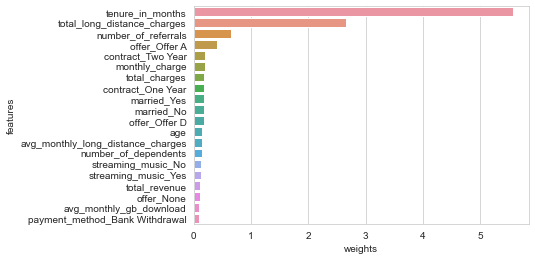

In [31]:
sns.barplot(data = weight_df.head(20), x = 'weights', y = 'features')

<AxesSubplot:xlabel='weights', ylabel='features'>

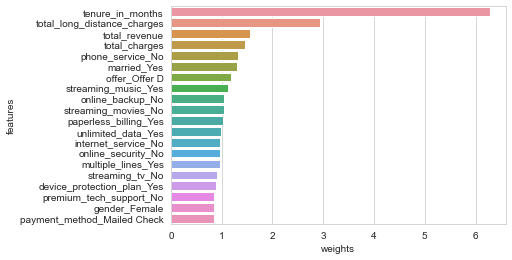

In [32]:
sns.barplot(data = weight_df1.head(20), x= 'weights', y = 'features')

In [33]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, plot_confusion_matrix

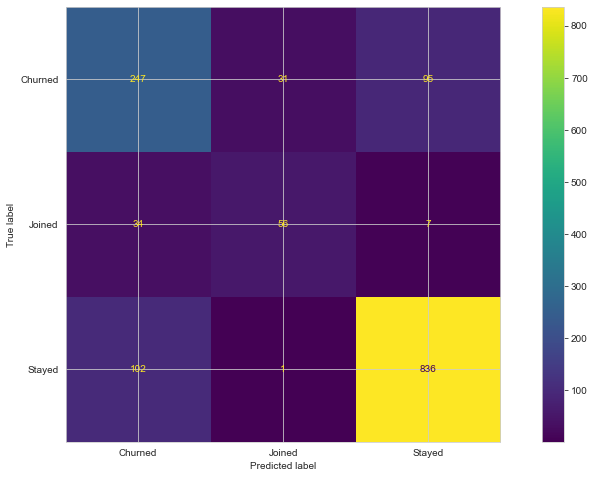

In [34]:
plt.rcParams['figure.figsize'] = (15,8)
ConfusionMatrixDisplay.from_estimator(clf,X_test, y_test)
plt.show()

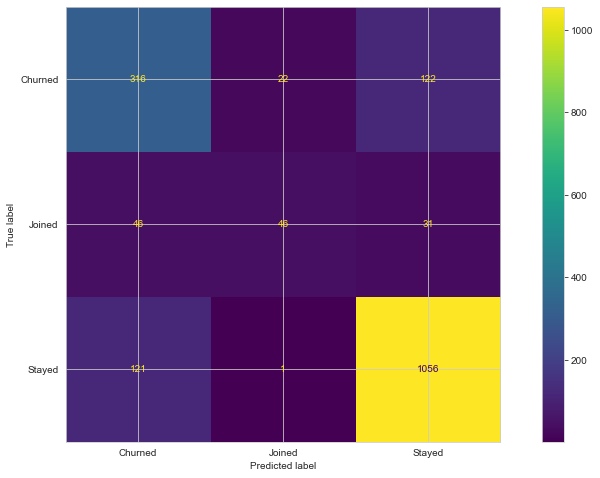

In [35]:
plt.rcParams['figure.figsize'] = (15,8)
ConfusionMatrixDisplay.from_estimator(model,X_test1, y_test1)
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
clf1 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    StandardScaler(), 
    LogisticRegression()
)

In [38]:
params = {
    'onehotencoder__use_cat_names': [True, False],
    'simpleimputer__strategy': ['mean', 'median'],
    'standardscaler__with_mean': [True],
    'logisticregression__max_iter': range(100,5000,100),
    'logisticregression__solver': ['liblinear']
}

In [39]:
params1 = dict(max_iter = range(100, 5000, 100), solver = ['liblinear'], penalty = ['l1', 'l2'])

In [40]:
clf2 = GridSearchCV(clf1, params, cv = 5,  verbose = 1, n_jobs = -1 )

In [41]:
model2 = GridSearchCV(model, params1, cv = 5,  verbose = 1, n_jobs = -1 )

In [42]:
# Fit model to training data
clf2.fit(X_train, y_train)

Fitting 5 folds for each of 196 candidates, totalling 980 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__max_iter': range(100, 5000, 100),
                         'logisticregression__solver': ['liblinear'],
                         'onehotencoder__use_cat_names': [True, False],
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler__with_mean': [True]},
             verbose=1)

In [43]:
#clf2.estimator.get_params().keys()

In [44]:
# Fit model to training data
model2.fit(X_train1, y_train1)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, random_state=42,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'max_iter': range(100, 5000, 100),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=1)

In [45]:
results = pd.DataFrame(clf2.cv_results_)
results.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__max_iter,param_logisticregression__solver,param_onehotencoder__use_cat_names,param_simpleimputer__strategy,param_standardscaler__with_mean,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.377782,0.044845,0.124264,0.012782,100,liblinear,True,mean,True,"{'logisticregression__max_iter': 100, 'logisti...",0.811003,0.803017,0.822538,0.817214,0.821492,0.815053,0.007258,1
90,1.530285,0.060907,0.144647,0.010609,2300,liblinear,False,mean,True,"{'logisticregression__max_iter': 2300, 'logist...",0.811003,0.803017,0.822538,0.817214,0.821492,0.815053,0.007258,1
88,1.527408,0.055337,0.139331,0.006194,2300,liblinear,True,mean,True,"{'logisticregression__max_iter': 2300, 'logist...",0.811003,0.803017,0.822538,0.817214,0.821492,0.815053,0.007258,1
150,1.525115,0.035789,0.146991,0.015813,3800,liblinear,False,mean,True,"{'logisticregression__max_iter': 3800, 'logist...",0.811003,0.803017,0.822538,0.817214,0.821492,0.815053,0.007258,1
86,1.524600,0.058025,0.146942,0.007960,2200,liblinear,False,mean,True,"{'logisticregression__max_iter': 2200, 'logist...",0.811003,0.803017,0.822538,0.817214,0.821492,0.815053,0.007258,1


In [46]:
results = pd.DataFrame(model2.cv_results_)
results.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.753289,0.308307,0.012646,0.006325,100,l1,liblinear,"{'max_iter': 100, 'penalty': 'l1', 'solver': '...",0.79754,0.811731,0.821023,0.805871,0.820076,0.811248,0.008838,1
38,4.090473,0.341635,0.011623,0.003318,2000,l1,liblinear,"{'max_iter': 2000, 'penalty': 'l1', 'solver': ...",0.79754,0.811731,0.821023,0.805871,0.820076,0.811248,0.008838,1
40,4.107017,0.270210,0.010293,0.003044,2100,l1,liblinear,"{'max_iter': 2100, 'penalty': 'l1', 'solver': ...",0.79754,0.811731,0.821023,0.805871,0.820076,0.811248,0.008838,1
42,3.998113,0.419851,0.004805,0.003923,2200,l1,liblinear,"{'max_iter': 2200, 'penalty': 'l1', 'solver': ...",0.79754,0.811731,0.821023,0.805871,0.820076,0.811248,0.008838,1
44,3.886490,0.329362,0.000100,0.000201,2300,l1,liblinear,"{'max_iter': 2300, 'penalty': 'l1', 'solver': ...",0.79754,0.811731,0.821023,0.805871,0.820076,0.811248,0.008838,1


In [47]:
acc_train = clf2.score(X_train, y_train)
acc_test = clf2.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8216
Validation Accuracy: 0.8105


In [48]:
acc_train = model2.score(X_train1, y_train1)
acc_test = model2.score(X_test1, y_test1)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8164
Validation Accuracy: 0.8109


In [49]:
# Extract best hyperparameters
print(clf2.best_params_)
print(clf2.best_score_)
print(clf2.best_estimator_)

{'logisticregression__max_iter': 100, 'logisticregression__solver': 'liblinear', 'onehotencoder__use_cat_names': True, 'simpleimputer__strategy': 'mean', 'standardscaler__with_mean': True}
0.8150526161503292
Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'married', 'offer',
                                     'phone_service', 'multiple_lines',
                                     'internet_service', 'internet_type',
                                     'online_security', 'online_backup',
                                     'device_protection_plan',
                                     'premium_tech_support', 'streaming_tv',
                                     'streaming_movies', 'streaming_music',
                                     'unlimited_data', 'contract',
                                     'paperless_billing', 'payment_method'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
       

In [50]:
# Extract best hyperparameters
print(model2.best_params_)
print(model2.best_score_)
print(model2.best_estimator_)

{'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.811248244029701
LogisticRegression(penalty='l1', random_state=42, solver='liblinear')


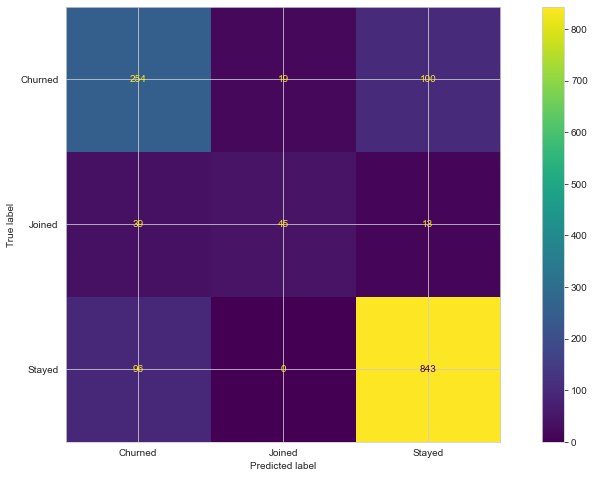

In [51]:
# Plot confusion matrix
plt.rcParams['figure.figsize'] = (15,8)
ConfusionMatrixDisplay.from_estimator(clf2, X_test, y_test)
plt.show()

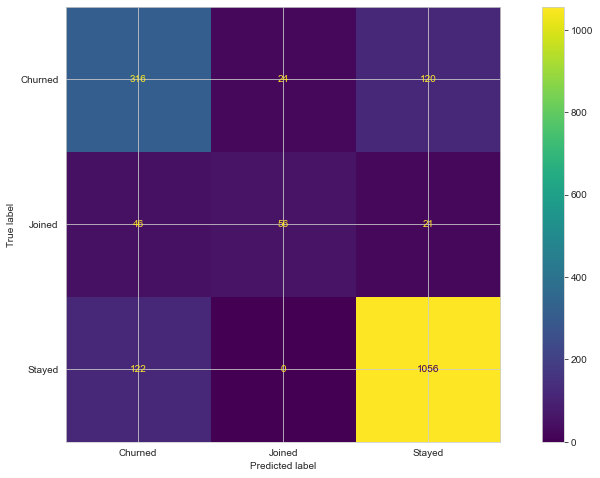

In [52]:
# Plot confusion matrix
plt.rcParams['figure.figsize'] = (15,8)
ConfusionMatrixDisplay.from_estimator(model2, X_test1, y_test1)
plt.show()

In [53]:
accuracy_score(y_test, clf2.predict(X_test))

0.8105039034776437

In [54]:
accuracy_score(y_test1, model2.predict(X_test1))

0.8109028960817717

### PCA

The base model is very good. It is not overfitting. It performs well on new unseen data. Let’s see whether we can improve the performance of the model by applying PCA.

In [55]:
# Define Feature matrix ad Target vector
X = data.drop('customer_status', axis = 1)
y = data.customer_status

In [56]:
num_cols= X.select_dtypes('number').columns.tolist()
cat_cols = X.select_dtypes('category').columns.tolist()

In [57]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [58]:
# Impute missing numerical values
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(X[num_cols + cat_cols])
X[num_cols + cat_cols] = imputer.transform(X[num_cols + cat_cols])

In [59]:
X.isna().sum()

gender                               0
age                                  0
married                              0
number_of_dependents                 0
zip_code                             0
latitude                             0
longitude                            0
number_of_referrals                  0
tenure_in_months                     0
offer                                0
phone_service                        0
avg_monthly_long_distance_charges    0
multiple_lines                       0
internet_service                     0
internet_type                        0
avg_monthly_gb_download              0
online_security                      0
online_backup                        0
device_protection_plan               0
premium_tech_support                 0
streaming_tv                         0
streaming_movies                     0
streaming_music                      0
unlimited_data                       0
contract                             0
paperless_billing        

In [60]:
# Scale numeric features
scaler = StandardScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

In [61]:
X

,gender,age,married,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,...,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
Customer ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,-0.595566,Yes,-0.490858,0.563959,-0.554852,0.351678,0.139533,-0.952994,None,...,Yes,One Year,Yes,Credit Card,0.206053,-0.671363,-0.14049,-0.186249,-0.318417,-0.640480
0003-MKNFE,Male,0.031134,No,-0.490858,0.935972,-0.824278,0.720807,-0.619041,-0.952994,None,...,No,Month-to-Month,No,Credit Card,-1.325084,-0.697468,-0.14049,1.795254,-0.733519,-0.788402
0004-TLHLJ,Male,0.309667,No,-0.490858,-0.539250,-1.033632,0.851364,-0.619041,-1.156740,Offer E,...,Yes,Month-to-Month,Yes,Bank Withdrawal,0.485053,-0.831608,-0.14049,-0.186249,-0.677663,-0.867462
0011-IGKFF,Male,-0.247399,Yes,-0.490858,1.179704,0.736000,-1.094917,-0.239754,-0.789997,Offer D,...,Yes,Month-to-Month,Yes,Bank Withdrawal,1.295161,-0.340795,-0.14049,-0.186249,-0.347298,-0.386983
0013-EXCHZ,Female,2.050498,Yes,-0.490858,1.089908,-0.797815,0.314157,0.518820,-1.197489,None,...,Yes,Month-to-Month,Yes,Credit Card,0.821197,-0.838506,-0.14049,-0.186249,-0.841289,-0.918555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,Female,-0.247399,No,-0.490858,0.512647,-1.392657,1.280908,-0.619041,-0.789997,Offer D,...,Yes,One Year,No,Credit Card,-0.145218,-0.594639,-0.14049,-0.186249,0.009431,-0.488337
9992-RRAMN,Male,-0.386666,Yes,-0.490858,-1.514180,0.622791,-0.555913,-0.239754,-0.423253,Offer D,...,Yes,Month-to-Month,Yes,Bank Withdrawal,0.861534,-0.014690,-0.14049,-0.186249,-0.354951,-0.131096
9992-UJOEL,Male,-1.640064,No,-0.490858,-0.680359,1.179055,-1.804989,-0.619041,-1.238238,Offer E,...,Yes,Month-to-Month,Yes,Credit Card,-0.308248,-0.928078,-0.14049,-0.186249,-0.819319,-0.983299


In [62]:
# One-hot encode categorical features
from sklearn.preprocessing import StandardScaler, OneHotEncoder

encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(X[cat_cols])

encoded_cols = list(encoder.get_feature_names_out(cat_cols))
X[encoded_cols] = encoder.transform(X[cat_cols])

In [63]:
X_scaled = X[num_cols + encoded_cols].copy()

In [64]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                7043 non-null   float64
 1   number_of_dependents               7043 non-null   float64
 2   zip_code                           7043 non-null   float64
 3   latitude                           7043 non-null   float64
 4   longitude                          7043 non-null   float64
 5   number_of_referrals                7043 non-null   float64
 6   tenure_in_months                   7043 non-null   float64
 7   avg_monthly_long_distance_charges  7043 non-null   float64
 8   avg_monthly_gb_download            7043 non-null   float64
 9   monthly_charge                     7043 non-null   float64
 10  total_charges                      7043 non-null   float64
 11  total_refunds                      7043 non-nu

In [65]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

In [66]:
# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)

Eigenvalues:
[3.72360900e+00 1.95661865e+00 1.80672422e+00 1.39216965e+00
 1.20455089e+00 1.11953089e+00 1.05054563e+00 1.00961714e+00
 9.87404474e-01 9.26983809e-01 7.44119752e-01 6.58600240e-01
 5.67318821e-01 5.00370811e-01 4.72783572e-01 4.26261267e-01
 4.00643357e-01 3.95003034e-01 3.86026535e-01 3.79794967e-01
 3.41069770e-01 3.27953774e-01 2.97418559e-01 2.93192147e-01
 2.61008383e-01 2.36502807e-01 2.14377962e-01 1.88789646e-01
 1.82636885e-01 1.76796112e-01 1.53552587e-01 1.15777522e-01
 1.11559149e-01 9.44536228e-02 8.96892048e-02 8.25154946e-02
 7.61481787e-02 7.36316463e-02 6.14491722e-02 4.49191496e-02
 7.34352391e-31 1.24048661e-31 6.34325716e-32 4.09356377e-32
 1.93220563e-32 1.88303690e-32 1.50271693e-32 1.50271693e-32
 1.50271693e-32 1.50271693e-32 1.50271693e-32 1.50271693e-32
 1.50271693e-32 1.50271693e-32 1.50271693e-32 1.50271693e-32
 1.50271693e-32 2.26837544e-33]


In [67]:
# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[1.58235180e+01 8.31467277e+00 7.67769473e+00 5.91604046e+00
 5.11875245e+00 4.75745899e+00 4.46430536e+00 4.29037932e+00
 4.19598633e+00 3.93922804e+00 3.16214519e+00 2.79872907e+00
 2.41082766e+00 2.12633135e+00 2.00909906e+00 1.81140201e+00
 1.70253842e+00 1.67856980e+00 1.64042407e+00 1.61394295e+00
 1.44937979e+00 1.39364322e+00 1.26388349e+00 1.24592330e+00
 1.10915803e+00 1.00502132e+00 9.11001540e-01 8.02263708e-01
 7.76117482e-01 7.51297050e-01 6.52523431e-01 4.91997871e-01
 4.74071846e-01 4.01381724e-01 3.81135276e-01 3.50650515e-01
 3.23592535e-01 3.12898503e-01 2.61128943e-01 1.90884428e-01
 3.12063868e-30 5.27146167e-31 2.69557421e-31 1.73956449e-31
 8.21092939e-32 8.00198633e-32 6.38581238e-32 6.38581238e-32
 6.38581238e-32 6.38581238e-32 6.38581238e-32 6.38581238e-32
 6.38581238e-32 6.38581238e-32 6.38581238e-32 6.38581238e-32
 6.38581238e-32 9.63948672e-33]


In [68]:
import numpy as np

Text(0, 0.5, 'Explained variance (%)')

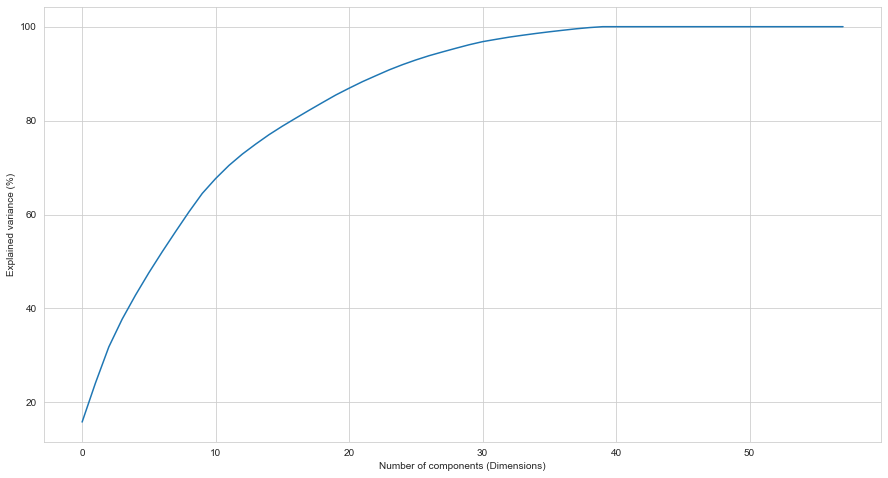

In [69]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

he first component alone captures about 15% variability in the data and the second one captures about 8.3% variability in the data and so on

**Running PCA again with 6 components**

In [90]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

         0         1         2         3         4         5         6   \
0 -0.936526 -0.341120  0.514434 -0.308767 -0.965310  0.577820 -0.520067   
1 -2.188096 -0.912617  0.247456 -0.476926  0.757029 -0.461610  2.038570   
2 -2.180679 -1.794938  0.001896  0.518156 -0.553343  0.617403 -0.604559   
3 -0.475527  0.188536 -2.053282 -0.130134  0.223736 -0.052328 -0.936321   
4 -1.718586 -1.233895 -0.592019 -1.302804  2.265452  0.399468 -0.826878   

         7         8         9   ...        30        31        32        33  \
0  0.015622 -0.430684  0.411390  ... -0.732698 -0.084544 -0.276748 -0.048529   
1  0.104881 -1.599790  0.076216  ... -0.006277 -0.117241 -0.145044 -0.229229   
2 -0.290934  0.456541  0.069942  ... -0.019829  0.127517 -0.091808 -0.518557   
3  0.264406 -0.806822  1.228154  ... -0.027110 -0.151606 -0.405986  0.815380   
4  0.769799 -0.726796  0.480852  ...  0.358421 -0.053728 -0.313216  0.032519   

         34        35        36        37        38        39  
0 -0

**Creating the heatmap of the transformed dataset**

<AxesSubplot:>

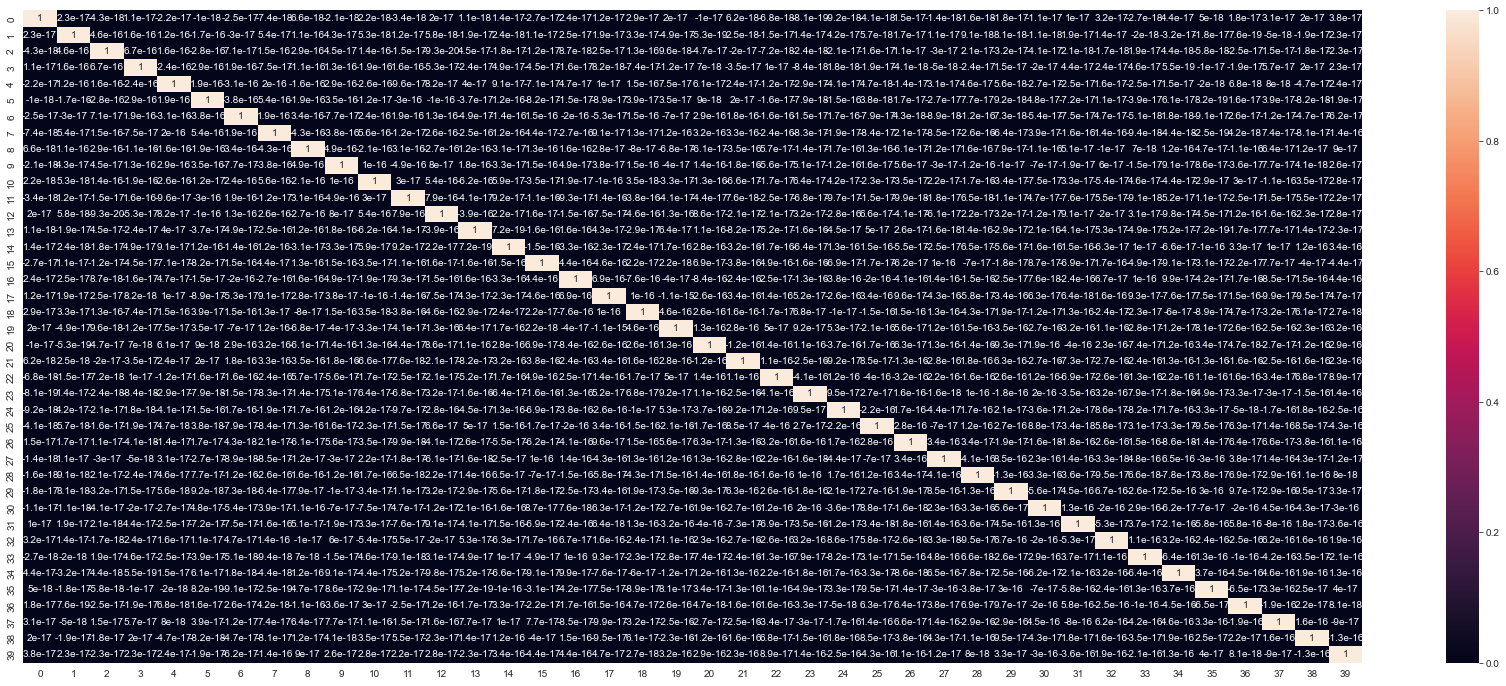

In [91]:
fig = plt.figure(figsize=(30, 12))
sns.heatmap(X_pca.corr(), 
            annot=True)

**Building a logistic regression model on the transformed data**

In [92]:
# Make train and test sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, 
                                                            shuffle=True, random_state=42)

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2500)

# Train the model
lr.fit(X_train_pca, y_train)

# Make predictions
y_pred = lr.predict(X_test_pca) # Predictions

# Measure accuracy
from sklearn.metrics import accuracy_score
print("Train accuracy:", round(lr.score(X_train_pca, y_train), 2))
print("Test accuracy:", round(lr.score( X_test_pca, y_test), 2))

Train accuracy: 0.82
Test accuracy: 0.8


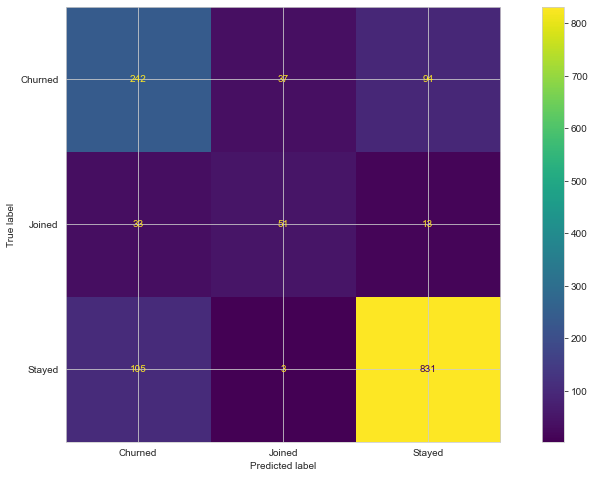

In [86]:
plt.rcParams['figure.figsize'] = (15,8)
ConfusionMatrixDisplay.from_estimator(lr,X_test_pca, y_test)
plt.show()

Accuracy is better before PCA, but we can still do better. Now we'll try Decision Tree next

In [93]:
X_pca.to_csv('X_pca.csv', index = False)

In [94]:
y_df = pd.DataFrame(y)

In [95]:
y_df

,customer_status
Customer ID,
0002-ORFBO,Stayed
0003-MKNFE,Stayed
0004-TLHLJ,Churned
0011-IGKFF,Churned
0013-EXCHZ,Churned
...,...
9987-LUTYD,Stayed
9992-RRAMN,Churned
9992-UJOEL,Joined


In [96]:
y_df.to_csv('y.csv', index = False)